<a href="https://colab.research.google.com/github/BaldoHenrique/Aula-blue/blob/main/Copy_of_Aula19_Exerc%C3%ADcios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercícios

Vamos explorar os dados do Titanic, gerando análises mais complexas.


In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#1 - Qual a quantidade de sobreviventes?

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_surviveds = df[df['Survived']==1]
print("Numero total de sobreviventes:",df_surviveds['Survived'].sum())

Numero total de sobreviventes: 342


#2-Qual a quantidade de sobreviventes por classe?

In [ ]:
df_surv_class1 = df_surviveds[df_surviveds['Pclass']==1]
print("Numero total de sobreviventes da classe 1:",df_surv_class1['Survived'].sum())

Numero total de sobreviventes da classe 1: 136


In [ ]:
df_surv_class2 = df_surviveds[df_surviveds['Pclass']==2]
print("Numero total de sobreviventes da classe 2:",df_surv_class2['Survived'].sum())

Numero total de sobreviventes da classe 2: 87


In [ ]:
df_surv_class3 = df_surviveds[df_surviveds['Pclass']==3]
print("Numero total de sobreviventes da classe 3:",df_surv_class3['Survived'].sum())

Numero total de sobreviventes da classe 3: 119


#3 - Qual o preço médio dos tickets?

In [ ]:
print("valor médio dos tickets:",round(df['Fare'].mean(),2),"$")

valor médio dos tickets: 32.2 $


#4 - Qual o maior e o menor ticket?

In [ ]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


estes seriam os valores máximos e mínimos

In [ ]:
print(round(df['Fare'].max(),2))
print(round(df['Fare'].min(),2))

512.33
0.0


porem é estranho o valor da tarifa ser 0, não podemos levar em conta o valor '0', então vamos achar o valor mínimo tirando os valores '0'

In [ ]:
print('Tarifa máxima:',round(df['Fare'].max(),2))
print('Tafifa mínima:',df['Fare'][df['Fare']!= 0.0].min())

Tarifa máxima: 512.33
Tafifa mínima: 4.0125


#5 - Entre os sobreviventes, identificou algum padrão que gostaria de compartilhar? Valor do ticket, classe?

O que da pra perceber é oq  mais sobreviveram era da primeira classe. diferença entre o ticket medio e o maior valor é muito grande, isso quer dizer que poucos pagarm bastante e muitos pagaram pouco. Podemos acreditar tbm que quem pagou mais foi quem sobreviveu

#6 - Percentual de homens e mulheres sobreviventes?

In [ ]:
sex_survi = df_surviveds['Sex'].value_counts(normalize=True)

In [ ]:
df_surviveds['Sex'].value_counts(normalize=True)[1]

0.31871345029239767

In [ ]:
print("porcentagem de mulheres sobreviventes:", round(sex_survi[0]*100,2),'%')
print("porcentagem de homens sobreviventes:", round(sex_survi[1]*100,2),'%') 

porcentagem de mulheres sobreviventes: 68.13 %
porcentagem de homens sobreviventes: 31.87 %


#7 - Idade média geral dos tribulantes?

In [ ]:
print('idade média dos tripulantes:',round(df['Age'].mean(),2))

idade média dos tripulantes: 29.7


#8 - Idade média dos homens e das mulheres?

In [ ]:
df[df['Sex']=='male']['Age'].mean()

30.72664459161148

In [ ]:
print('Idade média dos homens:',round(df[df['Sex']=='male']['Age'].mean(),2))
print('Idade média das mulheres:',round(df[df['Sex']=='female']['Age'].mean(),2))

Idade média dos homens: 30.73
Idade média das mulheres: 27.92


#9 - Idade média dos sobreviventes.

In [ ]:
print(round(df_surviveds['Age'].mean(),2))

28.34


#11 - Plotar um gráfico com o percentual de homens e mulheres.

In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
h = pd.DataFrame(df['Sex'].value_counts(normalize=True))['Sex'][0]
m = pd.DataFrame(df['Sex'].value_counts(normalize=True))['Sex'][1]
print('Porcentagem de homens:',round((h*100),2),'%')
print('Porcentagem de mulheres:',round((m*100),2),'%')

Porcentagem de homens: 64.76 %
Porcentagem de mulheres: 35.24 %


In [ ]:
sex_p = pd.DataFrame(df['Sex'].value_counts(normalize=True))
sex_p

,Sex
male,0.647587
female,0.352413


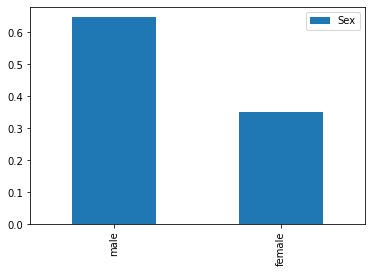

In [ ]:
sex_p.plot(kind="bar") 

#Gráficos
Pesquise os tipos de gráficos. Você pode, por exemplo, montar um DF com o percentual e plotar num gráfico de pizza.

#1 - 12 - Plotar um gráfico por classe.

In [ ]:
classe = pd.DataFrame(df['Pclass'].value_counts())
classe.columns = ['Classe']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc232e9fd0>],
      dtype=object)

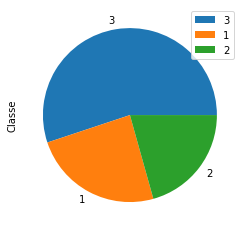

In [ ]:
classe.plot(kind="pie",subplots=True) 

#2 - 13 - Plota um gráfico de plot.box() nos preços e tentar idenficiar Outliers.

In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


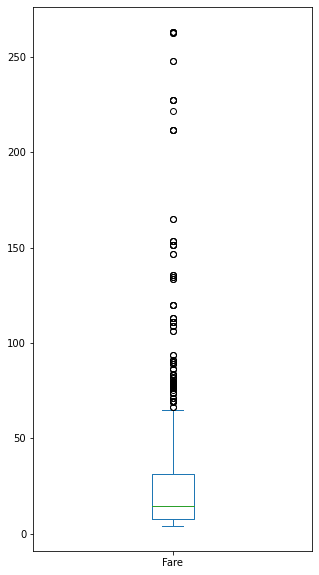

In [ ]:
[df['Fare']>0] and [df['Fare']<300]
filtro_1  = df[df['Fare']>0][df[df['Fare']>0]['Fare']<300]
filtro_1['Fare'].plot.box(figsize=(5,10))

#3 - 14 - Caso tenha identificado Outliers na atividade 13, alguma sugestão de resolução.

#4 - 15 - Plotar um gráfico de sobreviventes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc22d2fd50>],
      dtype=object)

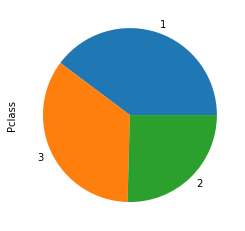

In [ ]:
df_surviveds['Pclass'].value_counts().plot(kind="pie",subplots=True) 